### **Predicting Bank Customer Churn with an Artificial Neural Network (ANN)**

#### **1. Problem Statement**

* Customer churn, or the rate at which customers cease their relationship with a company, is a significant challenge for the banking industry. 

* Losing existing customers is often more costly than acquiring new ones, making customer retention a top priority for banks. 

* By predicting which customers are at risk of churning, a bank can proactively intervene with targeted retention strategies, such as personalized offers or improved services, to enhance customer loyalty and profitability.

* The goal of this exercise is to build an Artificial Neural Network (ANN) to predict customer churn in a multinational bank. 

* The model will use various customer attributes and historical data to identify complex, non-linear patterns that indicate a high probability of a customer closing their account.

#### **2. Tasks to be Performed**

  1.  **Data Loading and Initial Exploration:** Load the "Bank Customer Churn" dataset (`churn_prediction.csv`) and inspect its structure, data types, and initial rows.

  2.  **Data Preprocessing and Cleaning:**
  
      * Drop irrelevant features that do not contribute to the prediction.
  
      * Perform one-hot encoding on categorical variables like `Geography` and `Gender` to convert them into a numerical format suitable for the neural network.
  
      * Scale numerical features to a standard range to ensure that no single feature dominates the model's learning process.
  
  3.  **Model Building:** Construct a deep learning model using TensorFlow/Keras, consisting of an input layer, one or more hidden layers, and an output layer for binary classification.

  4.  **Model Training:** Train the ANN model on the preprocessed training data.

  5.  **Model Evaluation:** Evaluate the trained model's performance on the test set using a classification report and confusion matrix to measure key metrics like accuracy, precision, and recall.

  6.  **Results Analysis:** Analyze the evaluation metrics to understand the model's strengths and weaknesses, particularly in its ability to predict the minority class (churned customers).

---

#### **3. Solution: Step-by-Step Guide**

##### **3.1 Step 1: Data Loading and Initial Exploration**

* First, we'll import the necessary libraries for data manipulation, visualization, and deep learning. 

* Then, we'll load the dataset and take a quick look at its structure to understand the features and the target variable (`Exited`).

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Load the dataset
df = pd.read_csv('Churn_Prediction.csv')

# Display the first 5 rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### **3.2 Step 2: Data Preprocessing and Cleaning**

* Columns such as `RowNumber`, `CustomerId`, and `Surname` are unique identifiers that do not help in predicting churn, so we will remove them.

In [15]:
# Drop unnecessary columns that do not contribute to the prediction
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

# Display the first 5 rows of the cleaned dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Neural networks require numerical inputs. 

* We will convert the `Gender` column to numerical values (Male to `1` and Female to `0`) and use one-hot encoding for the `Geography` column to create binary columns for each country.

In [17]:
# Convert 'Gender' to numerical
df.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)

In [19]:
# One-hot encode 'Geography' and drop the first dummy variable to avoid multicollinearity
df = pd.get_dummies(data=df, columns=['Geography'], drop_first=True, dtype=int)

# Display the updated dataframe
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [33]:
# Check data types of the dataframe
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

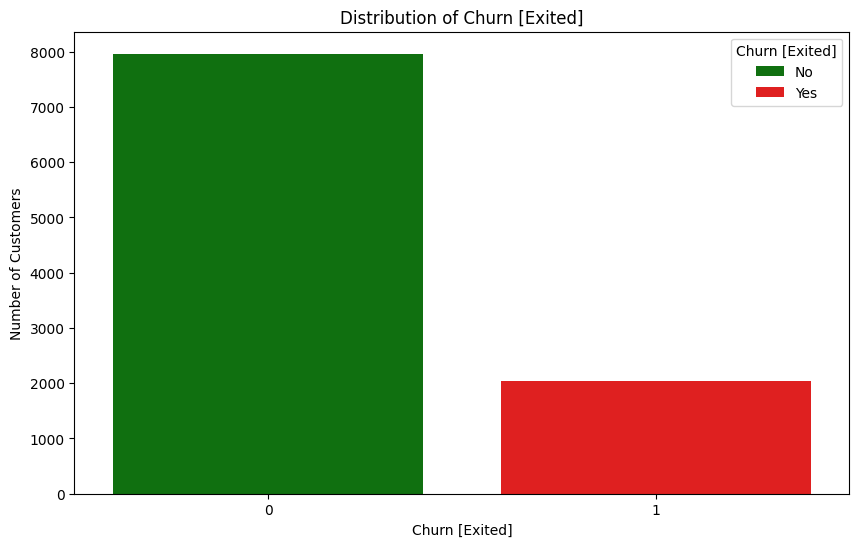

In [37]:
# Data Visualization - Countplot for Distribution of Customer Churn
plt.figure(figsize=(10,6))
sns.countplot(x='Exited', data=df, hue="Exited", palette=['green','red'])
plt.title('Distribution of Churn [Exited]')
plt.ylabel('Number of Customers')
plt.xlabel('Churn [Exited]')
plt.legend(title='Churn [Exited]', labels=["No", "Yes"], loc='upper right')
plt.show()

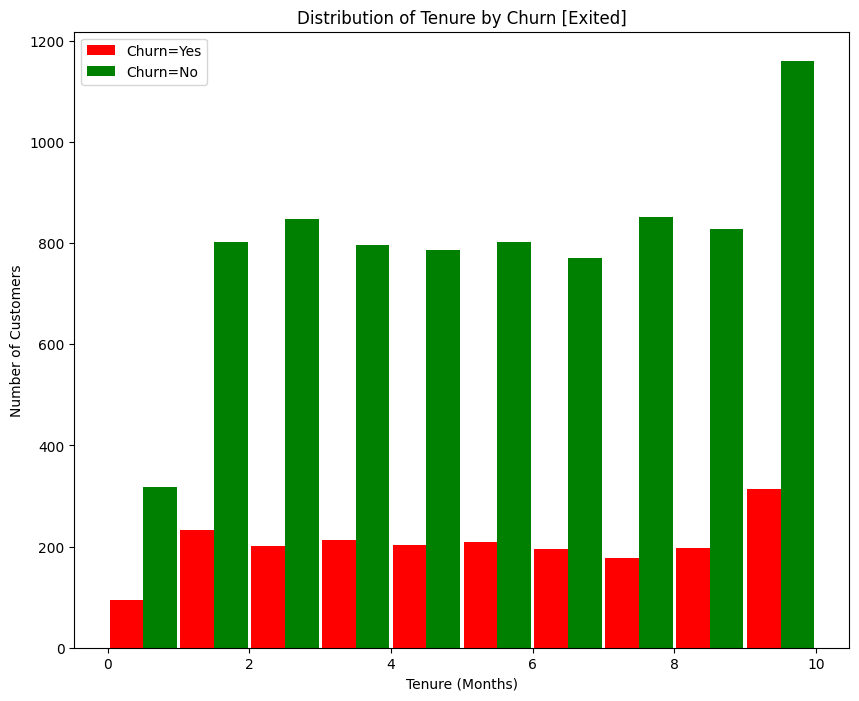

In [40]:
# Data Visualization - Histogram for Tenure based on Churn
plt.figure(figsize=(10,8))

tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'], color=['red', 'green'])
plt.title('Distribution of Tenure by Churn [Exited]')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

* Next, we'll scale our numerical features. 

* This is a crucial step for neural networks as it standardizes the data, preventing features with large values (for example, `EstimatedSalary`) from dominating the training process. 

* We'll use `StandardScaler` for this.

In [20]:
# Separate features (X) and target variable (y)
X = df.drop('Exited', axis='columns')
y = df['Exited']

# Identify numerical columns for scaling
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Scale the data using StandardScaler
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Display the scaled features
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1


##### **3.3 Step 3: Training and Testing Split**

* We need to split the preprocessed data into training and testing sets. 

* The training set will be used to teach the model, and the testing set will be used to evaluate its performance on unseen data. 

* A typical split is 80% for training and 20% for testing.

In [21]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)


In [42]:
# Check the distribution of target variable in training set
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [43]:
# Check the distribution of target variable in test set
y_test.value_counts()

Exited
0    1607
1     393
Name: count, dtype: int64

In [45]:
# Check the distribution of target variable in the original dataframe
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

* **This dataset is imbalanced, with a higher number of non-churned customers compared to churned ones.**

* **This imbalance can affect model performance.**

##### **3.4 Step 4: Building and Training the ANN Model**

* We will build a simple feedforward ANN using Keras's `Sequential` model. 

* The network will have an input layer, two hidden layers with the `relu` activation function to introduce non-linearity, and a single-neuron output layer with a `sigmoid` activation function to output a probability of churn. 

* We'll use the `adam` optimizer and `binary_crossentropy` as the loss function, which are standard for this type of problem.

In [23]:
# Build the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model for 100 epochs
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7782 - loss: 0.5075
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4252
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.3953
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.3771
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3668
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3605
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3569
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8524 - loss: 0.3534
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3511
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8553 - loss: 0.3484
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3466
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

##### **3.5 Step 5: Model Evaluation**

* After training, we evaluate the model on the test data. 

* A classification report will provide a comprehensive summary of precision, recall, and F1-score for each class (churn and no-churn).

In [24]:
# Get predictions on the test set with a threshold of 0.5
# First, get the predicted probabilities
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [27]:
# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



* A confusion matrix provides a visual representation of the model's performance, showing the number of correct and incorrect predictions.

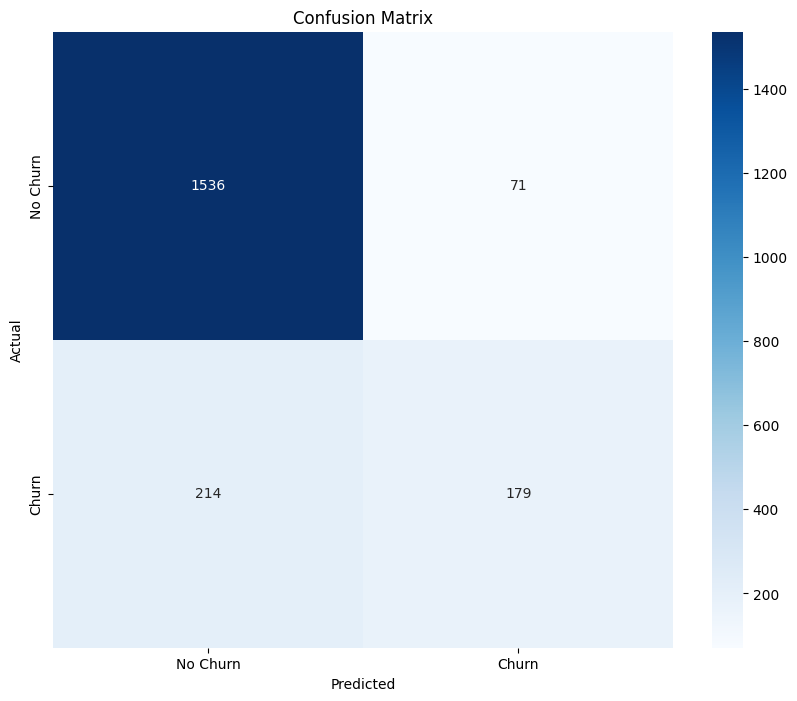

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **4. Results Analysis**

- The accuracy score gives an overall measure of correct predictions, while precision, recall, and F1-score provide a more nuanced view, especially for imbalanced datasets. 

- Precision for the churn class indicates the reliability of the model's positive predictions, and recall shows how many of the actual churners the model was able to identify. 

- The confusion matrix helps us pinpoint where the model is making errors (false positives and false negatives). 

- For a churn prediction model, a high recall is often desired, as it is critical to identify as many potential churners as possible.

#### **5. Summary**

* The notebook demonstrates a full-cycle machine learning exercise for customer churn prediction using an ANN. 

* By following the steps from data preprocessing to model evaluation, we can build a robust predictive model that offers valuable insights for a bank's customer retention strategy. 

* The results of the model can be used to identify at-risk customers, allowing the bank to take timely action.

---

*Deep Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)